In [274]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings(action = "ignore")

In [275]:
df = pd.read_csv("job_fair.csv")
data = df
data.head()

,student_id,skills,experience_years,course_grades,projects_completed,extracurriculars,job_offer
0,1,Python;Data Analysis;SQL,3,75.26,9,0,1
1,2,Java,4,74.25,6,2,1
2,3,Data Analysis,2,74.89,4,3,0
3,4,Data Analysis,4,72.73,2,3,1
4,5,Machine Learning;Python;C++,4,84.85,1,4,0


In [276]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   student_id          20000 non-null  int64  
 1   skills              20000 non-null  object 
 2   experience_years    20000 non-null  int64  
 3   course_grades       20000 non-null  float64
 4   projects_completed  20000 non-null  int64  
 5   extracurriculars    20000 non-null  int64  
 6   job_offer           20000 non-null  int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 1.1+ MB


In [277]:
len(data["skills"].unique())

156

# checking the probablity of the target variable

In [278]:
data.head()

,student_id,skills,experience_years,course_grades,projects_completed,extracurriculars,job_offer
0,1,Python;Data Analysis;SQL,3,75.26,9,0,1
1,2,Java,4,74.25,6,2,1
2,3,Data Analysis,2,74.89,4,3,0
3,4,Data Analysis,4,72.73,2,3,1
4,5,Machine Learning;Python;C++,4,84.85,1,4,0


In [279]:
data["job_offer"].value_counts()/len(data)     # so the probablity is almost balanced

job_offer
0    0.50625
1    0.49375
Name: count, dtype: float64

<Axes: >

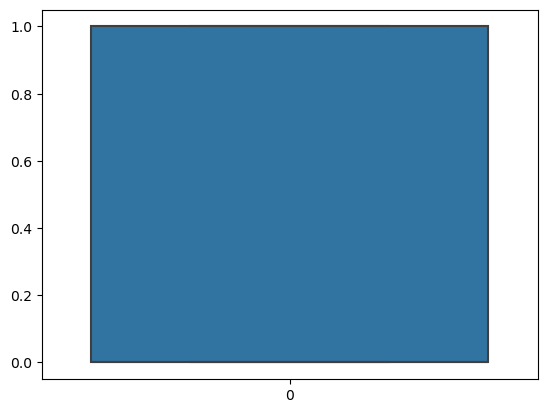

In [280]:
sns.boxplot(data["job_offer"])

# Label Encoding

In [281]:
from sklearn.preprocessing import LabelEncoder 

In [282]:
le = LabelEncoder()
data["skills"] = le.fit_transform(data["skills"])
data.head()

,student_id,skills,experience_years,course_grades,projects_completed,extracurriculars,job_offer
0,1,114,3,75.26,9,0,1
1,2,52,4,74.25,6,2,1
2,3,26,2,74.89,4,3,0
3,4,26,4,72.73,2,3,1
4,5,95,4,84.85,1,4,0


# Standard scaler method

In [283]:
from sklearn.preprocessing import StandardScaler 
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [284]:
x = data.drop(columns = ["job_offer","student_id"])
y = data["job_offer"]

# split into Train and Test 

In [285]:
from sklearn.model_selection import train_test_split
scaler = StandardScaler()
model = LogisticRegression()

# Step 2: Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Step 3: Scale the training and testing features
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Step 4: Fit the model on the scaled training data
model.fit(x_train_scaled, y_train)

# Step 5: Make predictions on the scaled testing data
y_pred = model.predict(x_test_scaled)

# Step 6: Generate the classification report
report = classification_report(y_test, y_pred)

# Print the classification report
print(report)

              precision    recall  f1-score   support

           0       0.51      0.69      0.59      3053
           1       0.50      0.33      0.39      2947

    accuracy                           0.51      6000
   macro avg       0.51      0.51      0.49      6000
weighted avg       0.51      0.51      0.49      6000



# logistic regression

In [286]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test,y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
confusion_mat = confusion_matrix(y_test,y_pred)

# Output the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("Confusion Matrix:\n", confusion_mat)

Accuracy: 0.5106666666666667
Precision: 0.5086871141107361
Recall: 0.5106666666666667
F1-Score: 0.4937891295458806
Confusion Matrix:
 [[2106  947]
 [1989  958]]


# Decision Tree

In [287]:
from sklearn.tree import DecisionTreeClassifier as dtc
from sklearn import tree

In [288]:
# model = make_pipeline(StandardScaler(),dtc())
# skf = StratifiedKFold(n_splits = 5)
# pred = cross_val_predict(model, x, y, cv=skf)

In [289]:
scaler = StandardScaler()
model = dtc(max_depth =  10, max_leaf_nodes =  None, min_samples_leaf =  1, min_samples_split =  2)


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

model.fit(x_train_scaled, y_train)

y_pred = model.predict(x_train_scaled)


# gridsearchCv cross 

In [290]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [5, 10, 20, None],
    'min_samples_leaf': [1, 5, 10, 20],
    'min_samples_split': [2, 5, 10, 20],
    'max_leaf_nodes': [10, 30, 50, 100, None]
}

grid_search = GridSearchCV(dtc(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train_scaled, y_train)

print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'max_depth': 10, 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [291]:

report = classification_report(y_train, y_pred)

print(report)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


accuracy = accuracy_score(y_train, y_pred)
precision = precision_score(y_train, y_pred, average='weighted')
recall = recall_score(y_train, y_pred, average='weighted')
f1 = f1_score(y_train, y_pred, average='weighted')
confusion_mat = confusion_matrix(y_train, y_pred)

print("no of the depth of the decision tree: ",model.get_depth())
print("no of the leave nodes: ",model.get_n_leaves())
print(" ")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("Confusion Matrix:\n", confusion_mat)

              precision    recall  f1-score   support

           0       0.61      0.51      0.56      7072
           1       0.57      0.67      0.62      6928

    accuracy                           0.59     14000
   macro avg       0.59      0.59      0.59     14000
weighted avg       0.59      0.59      0.59     14000

no of the depth of the decision tree:  10
no of the leave nodes:  386
 
Accuracy: 0.5908571428571429
Precision: 0.5942014612341103
Recall: 0.5908571428571429
F1-Score: 0.5883192029276249
Confusion Matrix:
 [[3621 3451]
 [2277 4651]]


In [292]:
y_pred = model.predict(x_test_scaled)

In [293]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
confusion_mat = confusion_matrix(y_test, y_pred)


report = classification_report(y_test, y_pred)

print(report)


print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("Confusion Matrix:\n", confusion_mat)

              precision    recall  f1-score   support

           0       0.51      0.41      0.45      3053
           1       0.49      0.58      0.53      2947

    accuracy                           0.50      6000
   macro avg       0.50      0.50      0.49      6000
weighted avg       0.50      0.50      0.49      6000

Accuracy: 0.49583333333333335
Precision: 0.49742513445681374
Recall: 0.49583333333333335
F1-Score: 0.49209242526815583
Confusion Matrix:
 [[1255 1798]
 [1227 1720]]
